In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

import streamlit as st
from datetime import date

In [2]:
df = pd.read_csv('/Users/bango/Desktop/지난 학기/2022 2학년 1학기/수업/빅데이터 처리와 시각화/분프 팀플/clensing data.csv',encoding = 'utf-8-sig')
df.info()
#시작시각 종료시각 데이트타임으로 바꿔주기
df['충전시작시각'] = pd.to_datetime(df['충전시작시각'], format='%Y-%m-%d')
df['충전종료시각'] = pd.to_datetime(df['충전종료시각'], format='%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635700 entries, 0 to 635699
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  635700 non-null  int64  
 1   충전구분        635700 non-null  object 
 2   충전소명        635700 non-null  object 
 3   주소          635700 non-null  object 
 4   주소_구        635700 non-null  object 
 5   충전기용량       635700 non-null  float64
 6   충전량         635700 non-null  float64
 7   총충전시간       635700 non-null  float64
 8   충전시간        635700 non-null  int64  
 9   충전분         635700 non-null  int64  
 10  충전시작시각      635700 non-null  object 
 11  충전종료시각      635700 non-null  object 
 12  Latitude    635700 non-null  float64
 13  Longitude   635700 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 67.9+ MB


In [3]:
df['year'] = df['충전시작시각'].dt.year
c = df['year'] == 2021

df_simple = df.loc[c,:]

In [4]:
#month week weekday 열 만들어주기

df_simple['month'] = df_simple['충전시작시각'].dt.month
df_simple['week'] = (np.floor( (df_simple['충전시작시각'].dt.dayofyear) / 7 ))
df_simple['week'].astype('int')
df_simple['day'] = df_simple['충전시작시각'].dt.dayofyear

df_simple.head()

/var/folders/f_/rz52sm316pg19y5gkynthdzm0000gn/T/ipykernel_14689/1526504973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple['month'] = df_simple['충전시작시각'].dt.month
/var/folders/f_/rz52sm316pg19y5gkynthdzm0000gn/T/ipykernel_14689/1526504973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple['week'] = (np.floor( (df_simple['충전시작시각'].dt.dayofyear) / 7 ))
/var/folders/f_/rz52sm316pg19y5gkynthdzm0000gn/T/ipykernel_14689/1526504973.py:6: SettingWithCopyWarning: 
A value is trying to be se

,Unnamed: 0,충전구분,충전소명,주소,주소_구,충전기용량,충전량,총충전시간,충전시간,충전분,충전시작시각,충전종료시각,Latitude,Longitude,year,month,week,day
0,0,급속,영등포전력지사,영등포구 경인로 878,영등포구,50.0,0.05,0.00,0,0,2021-01-01,2021-01-01,37.517129,126.910236,2021,1,0.0,1
1,1,급속,영등포전력지사,영등포구 경인로 878,영등포구,50.0,13.10,0.48,0,29,2021-01-02,2021-01-02,37.517129,126.910236,2021,1,0.0,2
2,2,급속,영등포전력지사,영등포구 경인로 878,영등포구,50.0,47.56,1.55,1,33,2021-01-02,2021-01-02,37.517129,126.910236,2021,1,0.0,2
3,3,급속,영등포전력지사,영등포구 경인로 878,영등포구,50.0,24.77,0.63,0,38,2021-01-04,2021-01-04,37.517129,126.910236,2021,1,0.0,4
4,4,급속,영등포전력지사,영등포구 경인로 878,영등포구,50.0,19.21,0.48,0,29,2021-01-04,2021-01-04,37.517129,126.910236,2021,1,0.0,4


In [5]:
df_simple = df_simple.rename(columns={'Latitude':'lat','Longitude':'lon'})


In [6]:
#홈페이지 이름 정하기
st.set_page_config(page_title = 'Streamlit Homepage', page_icon = '🚗',
                      layout = 'wide')

#타이틀 적어주기
st.title('Data App Dashboard')

#새로고침 버튼 만들기
if st.button('새로고침'):
    st.experimental_rerun()





2023-07-15 19:48:09.525 
  command:

    streamlit run /Users/bango/miniforge3/envs/stream/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [7]:
##민준씨 파일 해당본!

st.sidebar.title("조건 필터")
st.sidebar.header("날짜 조건")
col1, col2 = st.sidebar.columns(2)
with col1:
    start_date = st.date_input("시작일시", date(2021, 1, 1),
                                       min_value=date(2021,1,1),
                                       max_value=date(2021,12,31))
with col2:
    end_date = st.date_input("종료일시", date(2021, 12, 31),
                                     min_value=date(2021,1,1),
                                     max_value=date(2021,12,31))
df_simple = df_simple[df_simple['충전시작시각'].dt.date.between(start_date, end_date)]


st.sidebar.header('충전기')
option01 = st.sidebar.multiselect('충전구분', (df_simple.충전구분.unique()), default=(df_simple.충전구분.unique()))
df_simple = df_simple[df_simple.충전구분.isin(option01)]
option02 = st.sidebar.multiselect('충전기용량', (df_simple.충전기용량.unique()), default=(df_simple.충전기용량.unique()))
df_simple = df_simple[df_simple.충전기용량.isin(option02)]

st.sidebar.header('지역구 선택')
option03 = st.sidebar.multiselect('지역구', (df_simple.주소_구.unique()), default=(df.주소_구.unique()))
df_simple= df_simple[df_simple.주소_구.isin(option03)]

st.sidebar.header('충전시간')
option04 = st.sidebar.slider('충전시간',0.0,6.0,(0.0,6.0))

df_simple = df_simple[(option04[1] >= df_simple.총충전시간) & (option04[0] <= df_simple.총충전시간) ]



In [8]:
df_simple

,Unnamed: 0,충전구분,충전소명,주소,주소_구,충전기용량,충전량,총충전시간,충전시간,충전분,충전시작시각,충전종료시각,lat,lon,year,month,week,day
0,0,급속,영등포전력지사,영등포구 경인로 878,영등포구,50.0,0.05,0.00,0,0,2021-01-01,2021-01-01,37.517129,126.910236,2021,1,0.0,1
1,1,급속,영등포전력지사,영등포구 경인로 878,영등포구,50.0,13.10,0.48,0,29,2021-01-02,2021-01-02,37.517129,126.910236,2021,1,0.0,2
2,2,급속,영등포전력지사,영등포구 경인로 878,영등포구,50.0,47.56,1.55,1,33,2021-01-02,2021-01-02,37.517129,126.910236,2021,1,0.0,2
3,3,급속,영등포전력지사,영등포구 경인로 878,영등포구,50.0,24.77,0.63,0,38,2021-01-04,2021-01-04,37.517129,126.910236,2021,1,0.0,4
4,4,급속,영등포전력지사,영등포구 경인로 878,영등포구,50.0,19.21,0.48,0,29,2021-01-04,2021-01-04,37.517129,126.910236,2021,1,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635638,635638,완속,서울전력관리처,중구 퇴계로 140,중구,7.0,9.82,1.45,1,27,2021-12-24,2021-12-24,37.560597,126.987406,2021,12,51.0,358
635639,635639,완속,서울전력관리처,중구 퇴계로 140,중구,7.0,25.81,4.90,4,54,2021-12-27,2021-12-27,37.560597,126.987406,2021,12,51.0,361
635640,635640,완속,서울전력관리처,중구 퇴계로 140,중구,7.0,9.53,3.10,3,6,2021-12-27,2021-12-27,37.560597,126.987406,2021,12,51.0,361
635641,635641,완속,서울전력관리처,중구 퇴계로 140,중구,7.0,25.81,5.27,5,16,2021-12-29,2021-12-29,37.560597,126.987406,2021,12,51.0,363


In [9]:
#header 만들기 Overview
st.header('0. Overview')
col1, col2 = st.columns(2)
col1.metric(label = "평균 충전량", value = round(df_simple['충전량'].mean() ,2))
col2.metric(label = "평균 충전시간", value = round(df_simple['총충전시간'].mean() ,2))
            


DeltaGenerator()

In [10]:
st.header('1. 충전량 분석')

st.subheader('전체')

time_frame = st.selectbox("월 단위/주 단위/일 단위", ("month", "week","day"))

whole_values = df_simple.groupby(time_frame)[['충전량']].sum()

st.download_button('Download',whole_values.to_csv(encoding='euc-kr'), '충전량 분석.csv')

st.area_chart(whole_values, use_container_width=True)


DeltaGenerator()

In [11]:
st.subheader('지역별 비교')


city_range = st.radio(label="범위선택", options=("구단위", ""), index=0)


if city_range=='구단위':
    city_range='주소_구'
    small_region = st.multiselect("구선택", (df_simple.주소_구.unique()), (df_simple.주소_구.unique()))
    city_values = df_simple[df_simple['주소_구'].isin(small_region)]

        
    city_values = pd.pivot_table(city_values, index=time_frame, columns=city_range, 
                             values='충전량', aggfunc='sum',fill_value=0)
    city_values.index.name = None
    city_values.columns = list(city_values.columns)

    st.line_chart(city_values, use_container_width=True)



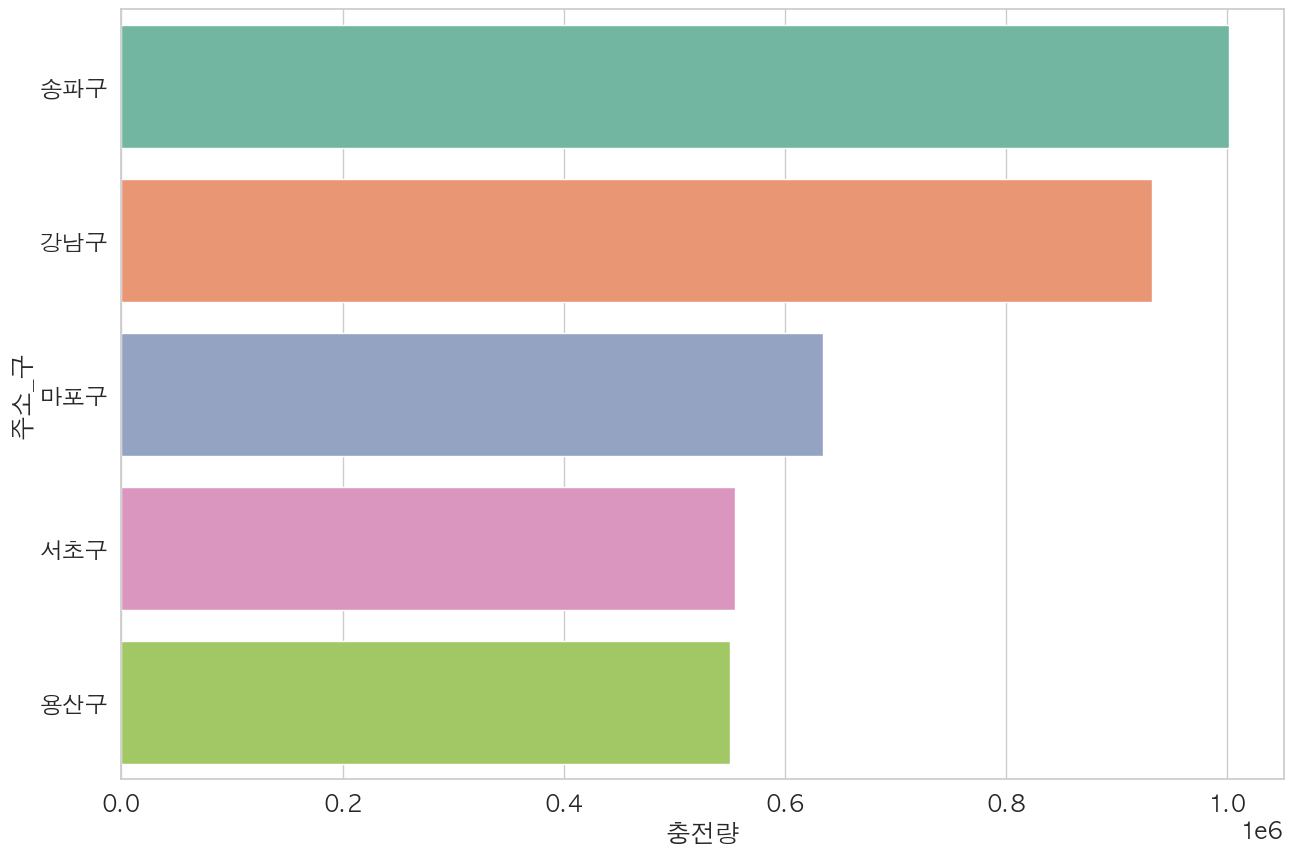

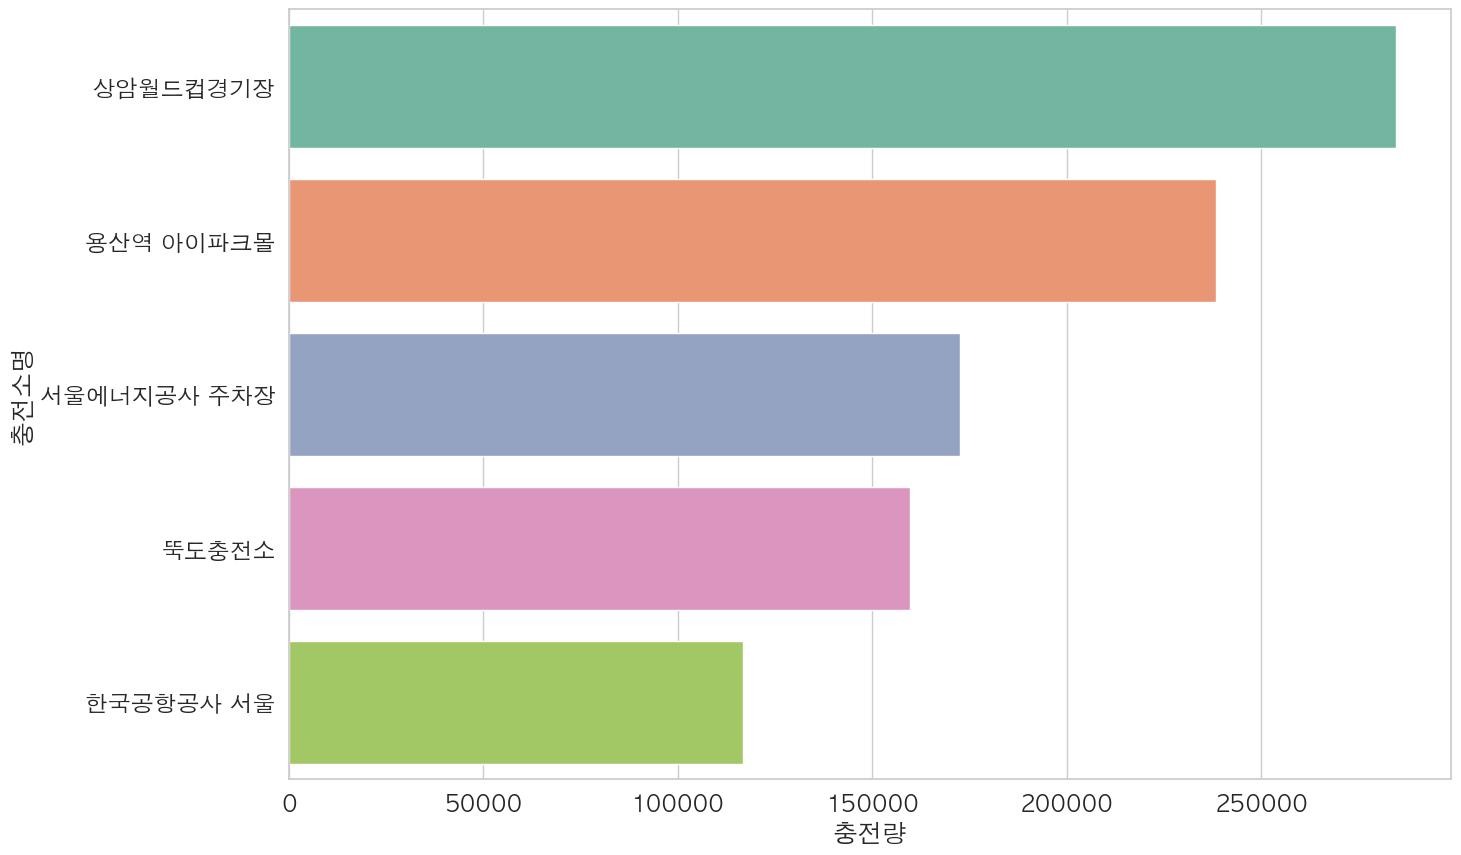

In [12]:
st.subheader('Top5 비교')

def top5(col_name, top=5):
    my_agg = (df_simple.groupby(col_name)['충전량'].sum()).reset_index().sort_values('충전량', ascending=False).head(top)
    my_agg[col_name] = my_agg[col_name].astype('str')
    fig = plt.figure(figsize=(15,10))
    ax = sns.barplot(x='충전량', y=col_name, data=my_agg)
    #ax.bar_label(ax.containers[0], label_type='center', color='white')
    return fig

col1, col2 = st.columns(2)
with col1:
    st.write('Top5 충전량')
    st.pyplot(top5('주소_구'))
with col2:
    st.write('Top5 충전량')
    st.pyplot(top5('충전소명'))


In [14]:
st.header('2. 충전시간분석')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [15]:
st.subheader('전체')

time_frame2 = st.selectbox("월단위/주단위/일단위", ("month", "week","day"))

whole_values2 = df_simple.groupby(time_frame2)[['총충전시간']].mean()

st.download_button('Download',whole_values2.to_csv(encoding='euc-kr'), '총충전시간 분석.csv')

st.area_chart(whole_values2, use_container_width=True)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [16]:
st.subheader('지역별 비교')


city_range = st.radio(label="범위선택", options=("구 단위", " "), index=0)


if city_range=='구단위':
    city_range='주소_구'
    small_region = st.multiselect("구선택", (df_simple.주소_구.unique()), (df_simple.주소_구.unique()))
    city_values = df_simple[df_simple['주소_구'].isin(small_region)]

        
    city_values = pd.pivot_table(city_values, index=time_frame2, columns=city_range, 
                             values='총충전시간', aggfunc='mean',fill_value=0)
    city_values.index.name = None
    city_values.columns = list(city_values.columns)

    st.line_chart(city_values, use_container_width=True)


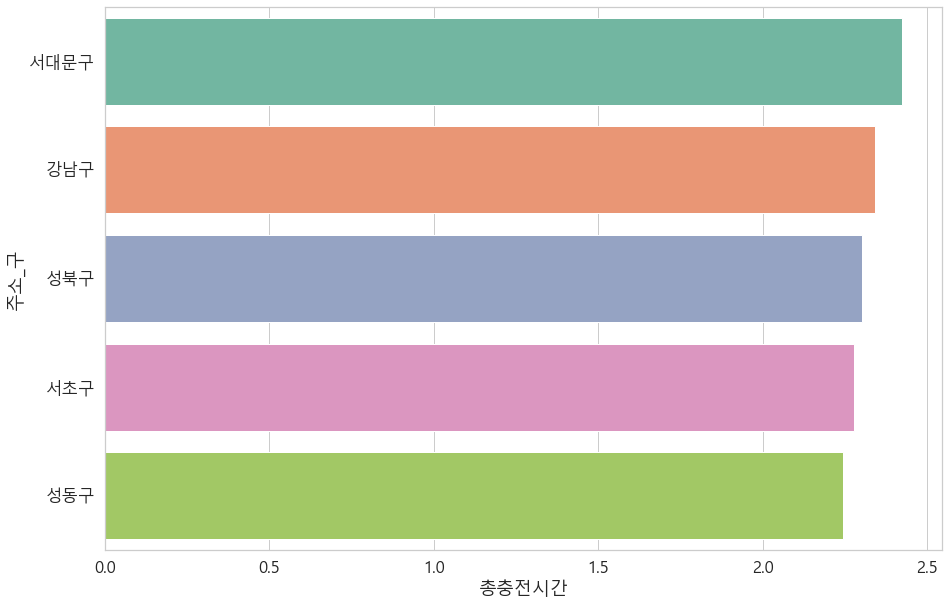

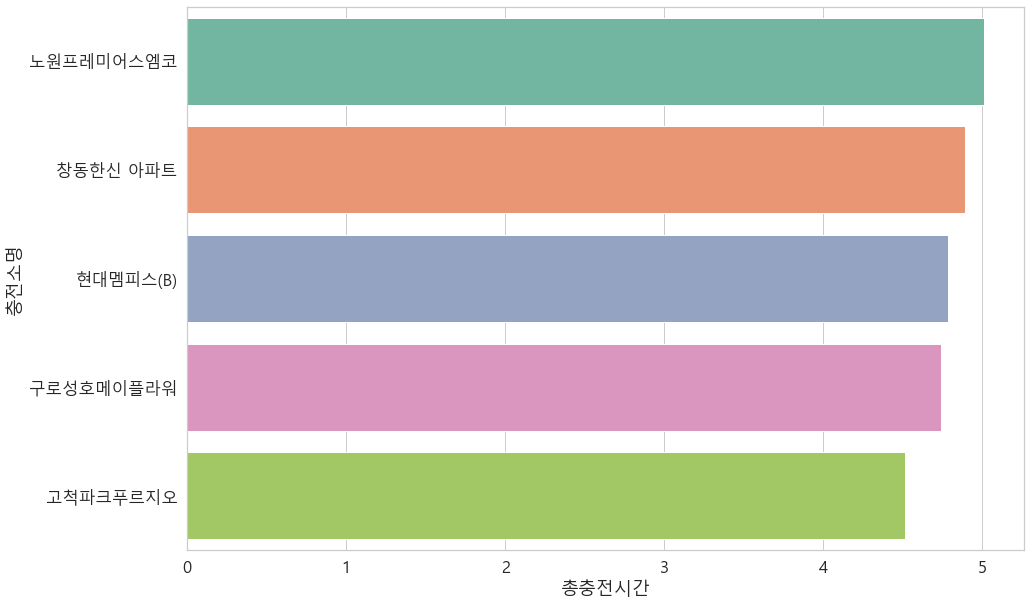

In [17]:
st.subheader('Top5 비교')

def top5(col_name, top=5):
    my_agg = (df_simple.groupby(col_name)['총충전시간'].mean()).reset_index().sort_values('총충전시간', ascending=False).head(top)
    my_agg[col_name] = my_agg[col_name].astype('str')
    fig = plt.figure(figsize=(15,10))
    ax = sns.barplot(x='총충전시간', y=col_name, data=my_agg)
    #ax.bar_label(ax.containers[0], label_type='center', color='white')
    return fig

col1, col2 = st.columns(2)
with col1:
    st.write('Top5 충전시간')
    st.pyplot(top5('주소_구'))
with col2:
    st.write('Top5 충전시간')
    st.pyplot(top5('충전소명'))

In [18]:
st.subheader('지역별분포')

jit = np.random.randn(len(df_simple), 2)
jit_ratio = 0.001
df_simple[['lat','lon']] = df_simple[['lat','lon']] + jit*jit_ratio
st.map(df_simple)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)